<a href="https://colab.research.google.com/github/Deepthi2006/prodigy-infotech-task-2/blob/main/Deepthi_Prodigy_Infotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats
class DataUnderstanding:
    def __init__(self, df):
        self.df = df

    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats

    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values

    def get_info(self):
        info = self.df.info()
        return info

    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes

    def get_value_counts(self):
        value_counts = {}
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts
df = pd.read_csv('/content/titanic - titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
du = DataUnderstanding(df)
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [3]:
du.get_info()
du.get_dtypes()
df['Survived'].value_counts()
#check for missing values
du.get_missing_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [4]:
most_frequent_port = df['Embarked'].mode()[0]
# Fill missing Embarked values with the most frequent port
df['Embarked'].fillna(most_frequent_port, inplace=True)
# Remove rows with missing ages
df.dropna(subset=['Age'], inplace=True)

In [5]:
du.get_value_counts()

{'PassengerId': PassengerId
 892     1
 1186    1
 1183    1
 1179    1
 1177    1
        ..
 1029    1
 1028    1
 1027    1
 1026    1
 1307    1
 Name: count, Length: 332, dtype: int64,
 'Survived': Survived
 0    205
 1    127
 Name: count, dtype: int64,
 'Pclass': Pclass
 3    146
 1     98
 2     88
 Name: count, dtype: int64,
 'Name': Name
 Kelly, Mr. James                          1
 Wittevrongel, Mr. Camille                 1
 Daly, Miss. Margaret Marcella Maggie""    1
 Snyder, Mr. John Pillsbury                1
 Dennis, Mr. William                       1
                                          ..
 Schmidt, Mr. August                       1
 Zakarian, Mr. Mapriededer                 1
 Carlsson, Mr. Carl Robert                 1
 Dintcheff, Mr. Valtcho                    1
 Saether, Mr. Simon Sivertsen              1
 Name: count, Length: 332, dtype: int64,
 'Sex': Sex
 male      205
 female    127
 Name: count, dtype: int64,
 'Age': Age
 21.0    17
 24.0    17
 22.0   

In [6]:
#check for duplicates
df.duplicated(subset='PassengerId').sum()

0

In [7]:
numerical_columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


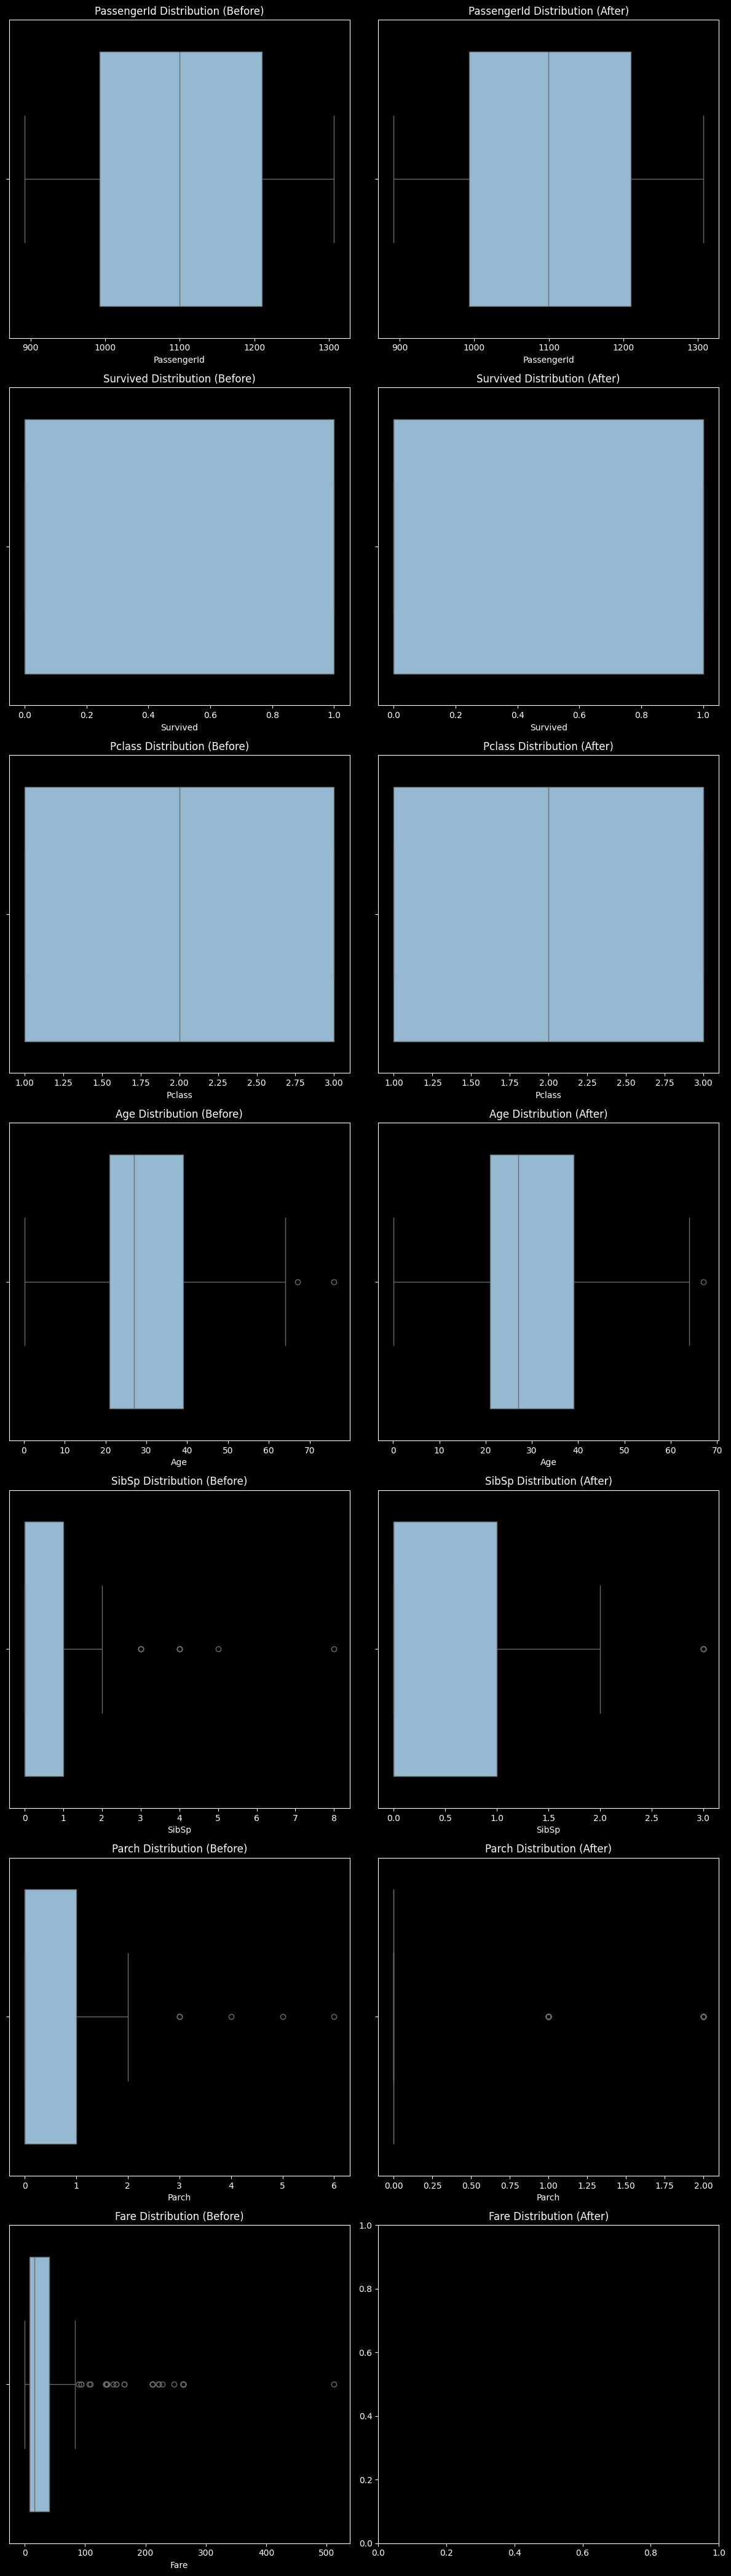

In [8]:
# Set the plot style to a dark theme
plt.style.use('dark_background')
# Define a custom color palette with darker shades of blue
custom_palette = sns.color_palette("Blues_d")
sns.set_palette(custom_palette)
# Function to check for outliers by plotting
def outlier_plot_box(df, column_name, ax=None):
    sns.boxplot(x=df[column_name], ax=ax)

# Function to remove outliers
def remove_outliers(data, cols, threshold=3):
    for col in cols:
        z_scores = np.abs(stats.zscore(data[col]))
        data = data[(z_scores < threshold)]
    return data

# Function to plot outliers before and after removal
def plot_outliers_before_and_after(df, numerical_columns, threshold=3):
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 6))

    for i, column in enumerate(numerical_columns):
        ax1 = axes[i][0]
        ax2 = axes[i][1]

        # Plot boxplot before removing outliers
        outlier_plot_box(df, column, ax=ax1)
        ax1.set_title(f"{column} Distribution (Before)")

        # Remove outliers
        df_cleaned = remove_outliers(df, [column], threshold=threshold)

        # Plot boxplot after removing outliers
        outlier_plot_box(df_cleaned, column, ax=ax2)
        ax2.set_title(f"{column} Distribution (After)")

    plt.tight_layout()
    plt.show()

# Call the function to plot outliers before and after removal
plot_outliers_before_and_after(df, numerical_columns)


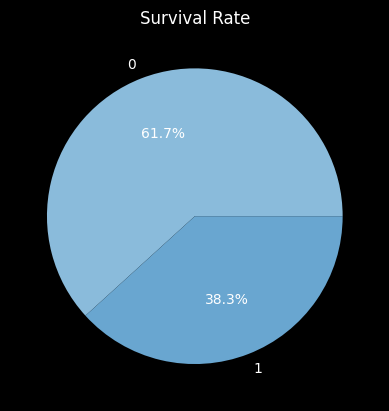

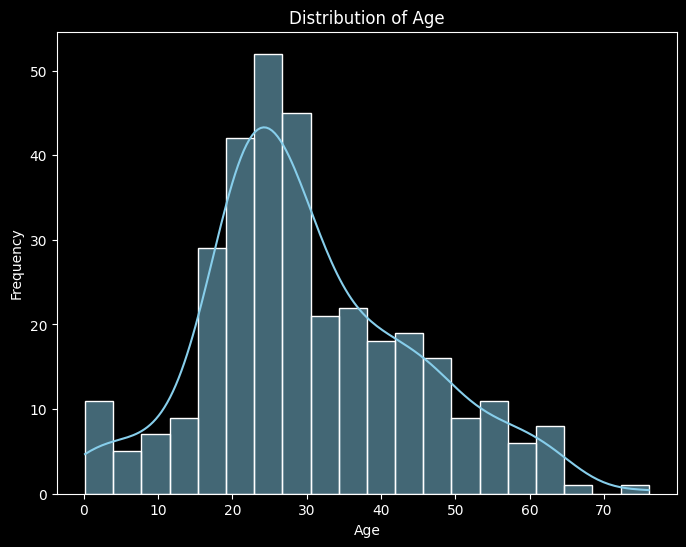

<ipython-input-9-736746db7c79>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Blues')


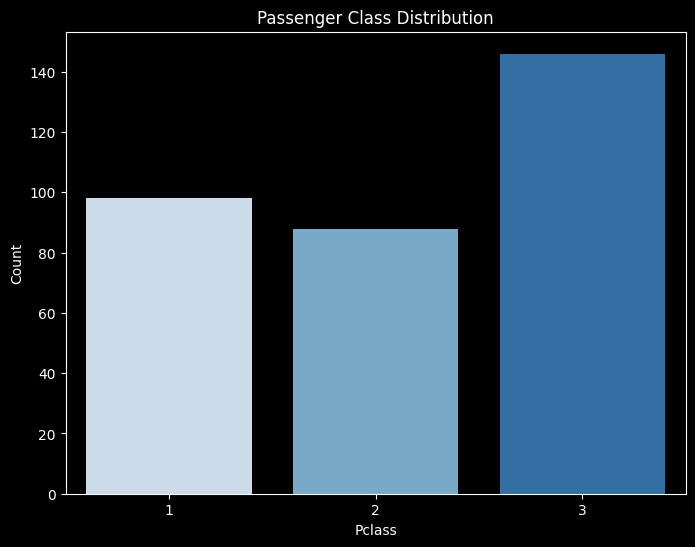

<ipython-input-9-736746db7c79>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Blues')


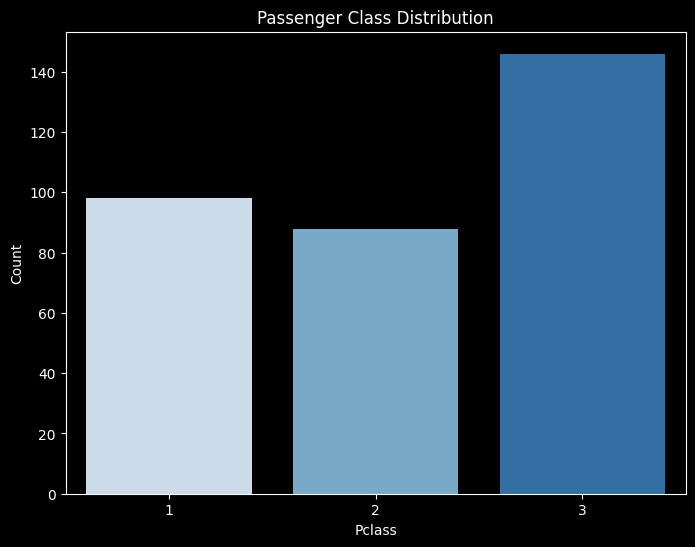

<ipython-input-9-736746db7c79>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='Blues')


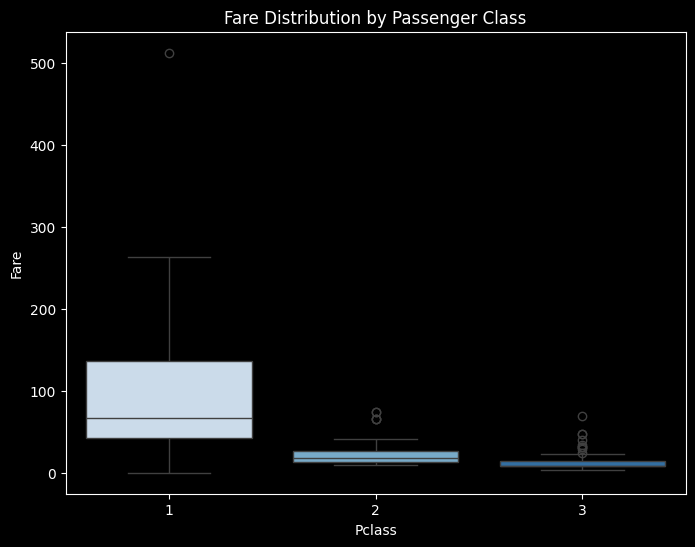

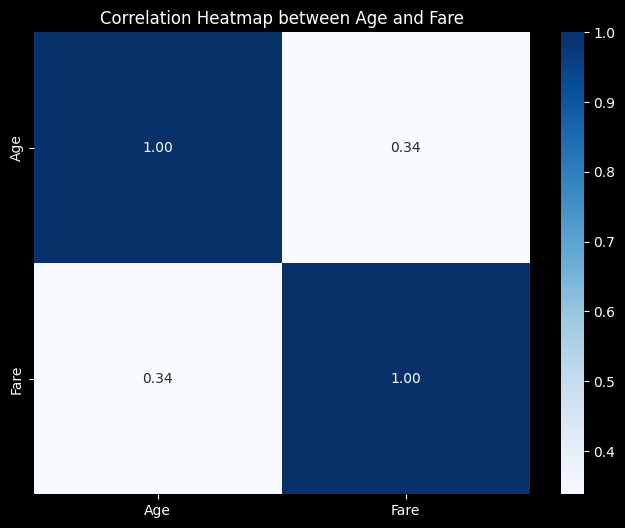

In [9]:
# Plot of Survival Rate
def plot_survival_rate(df):
    #Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%')

    # Add a title
    ax.set_title('Survival Rate')

    # Show the plot
    plt.show()
plot_survival_rate(df)
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()
# Bar plot for Pclass
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', palette='Blues')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()
# Bar plot for Pclass
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', palette='Blues')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()
# Box plot comparing fares by passenger class
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Blues')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()

# Correlation heatmap between Age and Fare
correlation_matrix = df[['Age', 'Fare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap between Age and Fare')
plt.show()

